In [13]:
import numpy as mp
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
movies = pd.read_csv('movies.dat', sep="::", names=['MovieID','Title','Genres'],encoding='latin-1')
movies.head()

<ipython-input-3-f41df180d8cb>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies = pd.read_csv('movies.dat', sep="::", names=['MovieID','Title','Genres'],encoding='latin-1')


,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings = pd.read_csv('ratings.dat', sep="::", names=['UserID','MovieID','Rating','Timestamp'])
ratings.head()

<ipython-input-4-84bbbb8112f3>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_csv('ratings.dat', sep="::", names=['UserID','MovieID','Rating','Timestamp'])


,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [5]:
users = pd.read_csv('users.dat', sep="::", names=['UserID','Gender','Age','Occupation','Zip-code'])
users.head()

<ipython-input-5-49a0fe133cb9>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users = pd.read_csv('users.dat', sep="::", names=['UserID','Gender','Age','Occupation','Zip-code'])


,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [6]:
rating_user = pd.merge(ratings, users, on=['UserID'])
rating_movie = pd.merge(ratings, movies, on=['MovieID'])

master_data = pd.merge(rating_user,rating_movie,on=['UserID','MovieID','Rating'])[['MovieID','Title','UserID','Age','Gender','Occupation','Rating']]
master_data.head()

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
0,1193,One Flew Over the Cuckoo's Nest (1975),1,1,F,10,5
1,661,James and the Giant Peach (1996),1,1,F,10,3
2,914,My Fair Lady (1964),1,1,F,10,3
3,3408,Erin Brockovich (2000),1,1,F,10,4
4,2355,"Bug's Life, A (1998)",1,1,F,10,5


<function matplotlib.pyplot.show(close=None, block=None)>

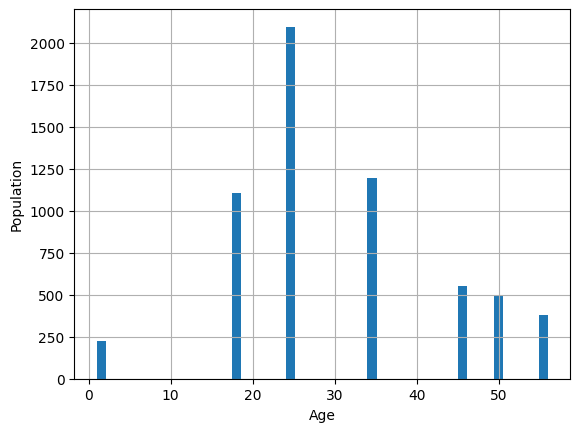

In [7]:
users['Age'].hist(bins=50)
plt.xlabel('Age')
plt.ylabel('Population')
plt.show

Age
1     112
18    448
25    790
35    423
45    143
50    108
56     53
Name: MovieID, dtype: int64

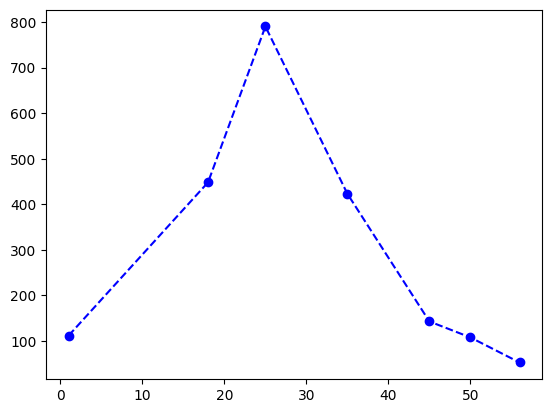

In [8]:
res = master_data[master_data.Title == "Toy Story (1995)"]
plt.plot(res.groupby("Age")['MovieID'].count(),'--ob')
res.groupby("Age")["MovieID"].count()

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

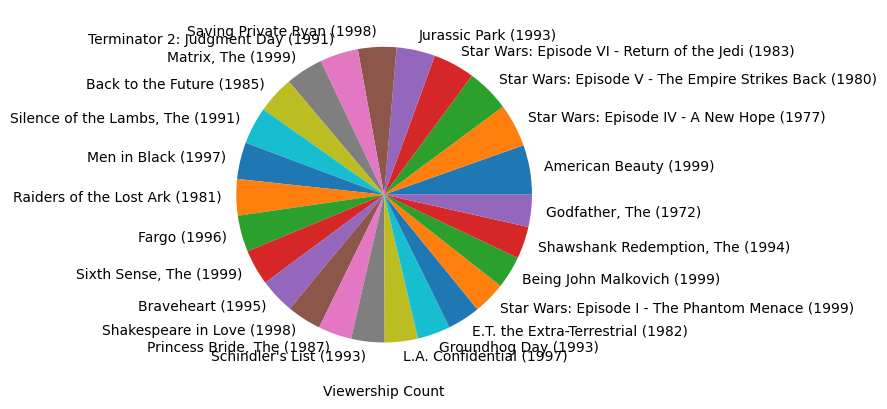

In [9]:
res = master_data.groupby("Title").size().sort_values(ascending=False)[:25]
plt.xlabel("Viewership Count")
plt.ylabel("Title")
res.plot(kind="pie")
print(res)

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
440667,1258,"Shining, The (1980)",2696,25,M,7,4
440668,1270,Back to the Future (1985),2696,25,M,7,2
440669,1617,L.A. Confidential (1997),2696,25,M,7,4
440670,1625,"Game, The (1997)",2696,25,M,7,4
440671,1644,I Know What You Did Last Summer (1997),2696,25,M,7,2
440672,1645,"Devil's Advocate, The (1997)",2696,25,M,7,4
440673,1805,Wild Things (1998),2696,25,M,7,4
440674,1892,"Perfect Murder, A (1998)",2696,25,M,7,4
440675,800,Lone Star (1996),2696,25,M,7,5
440676,2338,I Still Know What You Did Last Summer (1998),2696,25,M,7,2


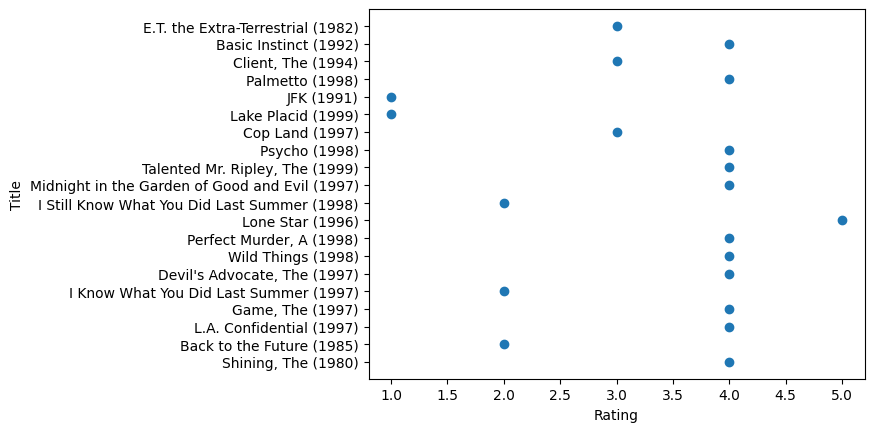

In [10]:
res = master_data[master_data.UserID == 2696]

plt.scatter(y=res.Title,x=res.Rating)
plt.xlabel('Rating')
plt.ylabel('Title')
res

In [19]:
val = movies.Genres.str.split("|")
res_col = []
for v in val:
  for i in v:
    if i not in res_col:
      res_col.append(i)

res_col.append("Gender")
res_col.append("Age")
res_col.append("Rating")

df = pd.DataFrame(columns=res_col)

res = master_data.merge(movies, on=['MovieID'], how="left")[["Genres","Rating","Gender","Age"]]

for index, row in res.head(20000).iterrows():
  tp = row.Genres.split("|")

  for i in tp:
    df.loc[index,i] = 1
    df.loc[index,"Gender"] = res.loc[index,"Gender"]
    df.loc[index,"Age"] = res.loc[index,"Age"]
    df.loc[index,"Rating"] = res.loc[index,"Rating"]
  df.loc[index, df.columns[~df.columns.isin(tp+["Gender","Rating","Age"])]] = 0

df.head()


,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,...,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western,Gender,Age,Rating
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,F,1,5
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,F,1,3
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,F,1,3
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,F,1,4
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,F,1,5


In [21]:
x = df[df.columns[~df.columns.isin(["Rating"])]]
y = df.Rating

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 0)
number = LabelEncoder()
x_train.Gender = number.fit_transform(x_train["Gender"].astype("str"))
x_test.Gender = number.fit_transform(x_test["Gender"].astype("str"))
y_train = number.fit_transform(y_train.astype(int))
y_test = number.fit_transform(y_test.astype(int))

In [22]:
from sklearn.svm import SVC
svm_model_linear = SVC(kernel='linear', C=1).fit(x_train, y_train)
svm_predictions = svm_model_linear.predict(x_test)

accuracy = svm_model_linear.score(x_test,y_test)

cm = confusion_matrix(y_test, svm_predictions)
accuracy

0.34

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(x_train, y_train)

accuracy = knn.score(x_test, y_test)

knn_predictions = knn.predict(x_test)
cm = confusion_matrix(y_test, knn_predictions)

accuracy

0.311

In [25]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(x_train,y_train)
gnb_predictions = gnb.predict(x_test)

accuracy = gnb.score(x_test, y_test)

cm = confusion_matrix(y_test,gnb_predictions)

accuracy

0.2788

In [26]:
# since svm model has higher accuracy, therefore svm model is best